<a href="https://colab.research.google.com/github/Charish53/RL_lab/blob/main/LAB02/tdl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#   CS22B1095   REDDIPALLI  SAI CHARISH

In [1]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time

##  FrozenLake

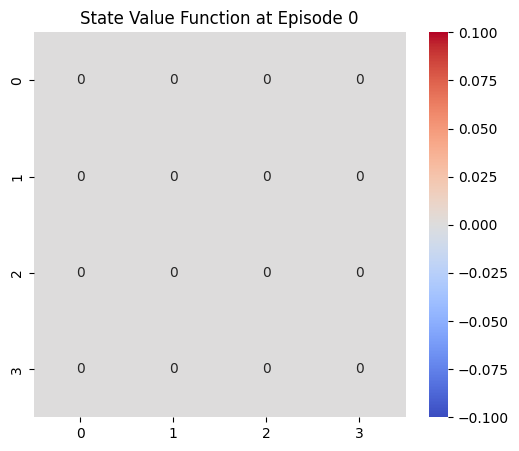

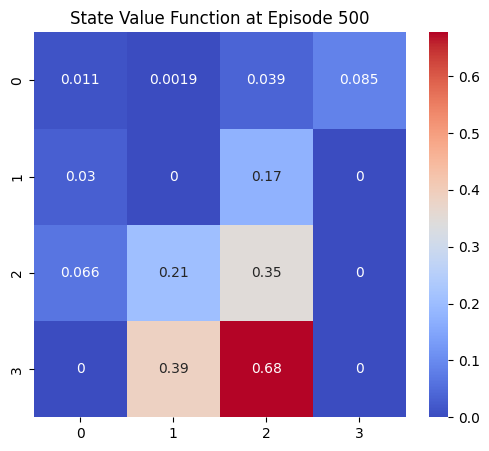

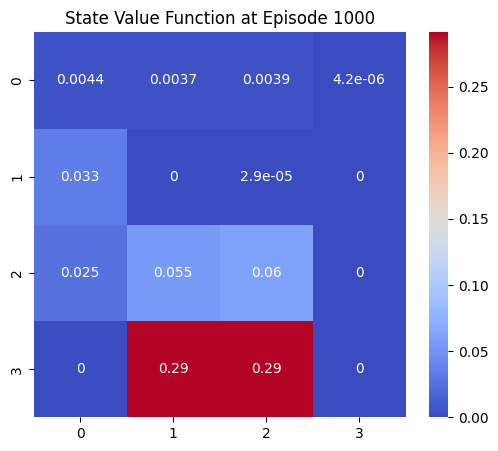

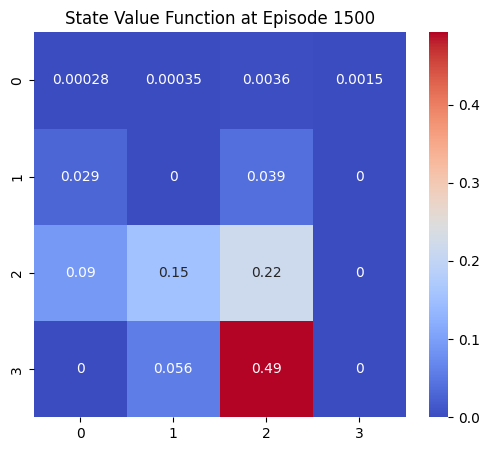

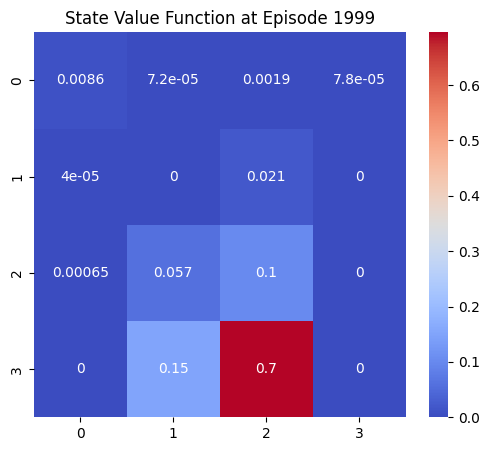

Final Learned Value Function:
[8.60196417e-03 7.17419969e-05 1.93804346e-03 7.80323736e-05
 3.98937084e-05 0.00000000e+00 2.07583875e-02 0.00000000e+00
 6.50376888e-04 5.72532142e-02 1.02787268e-01 0.00000000e+00
 0.00000000e+00 1.50702822e-01 6.95298827e-01 0.00000000e+00]


In [2]:
class TDnAgent:
    def __init__(self, env, alpha=0.1, gamma=0.99, n=5):
        self.env = env
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.n = n  # Number of steps for TD(n)
        self.V = np.zeros(env.observation_space.n)  # State-value function
        self.grid_size = int(np.sqrt(env.observation_space.n))

    def policy(self, state):
        """Purely random policy: chooses actions uniformly."""
        return self.env.action_space.sample()

    def train(self, episodes=1000, visualize_interval=100):
        for episode in range(episodes):
            state = self.env.reset()[0]
            done = False
            states, rewards = [], []

            while not done:
                action = self.policy(state)
                next_state, reward, done, _, _ = self.env.step(action)

                states.append(state)
                rewards.append(reward)

                # TD(n)
                if len(states) >= self.n:
                    G = sum([self.gamma ** i * rewards[i] for i in range(self.n)])  # Compute return
                    G += self.gamma ** self.n * self.V[next_state]  # Bootstrapped return
                    self.V[states[0]] += self.alpha * (G - self.V[states[0]])

                    # Remove first state and reward from buffer
                    states.pop(0)
                    rewards.pop(0)

                state = next_state  # Move to next state

            # Final updates for remaining steps
            while len(states) > 0:
                G = sum([self.gamma ** i * rewards[i] for i in range(len(rewards))])
                self.V[states[0]] += self.alpha * (G - self.V[states[0]])
                states.pop(0)
                rewards.pop(0)

            # Visualize every few episodes
            if episode % visualize_interval == 0 or episode == episodes - 1:
                self.visualize_value_function(episode)

    def visualize_value_function(self, episode):
        """Visualizes the learned state-value function as a heatmap."""
        plt.figure(figsize=(6, 5))
        sns.heatmap(self.V.reshape(self.grid_size, self.grid_size), annot=True, cmap="coolwarm", cbar=True)
        plt.title(f"State Value Function at Episode {episode}")
        plt.show()
        time.sleep(0.5)
    def get_value_function(self):
        return self.V


env = gym.make("FrozenLake-v1", is_slippery=False)
agent = TDnAgent(env, n=10)

# Train the agent
agent.train(episodes=2000, visualize_interval=500)

# Print final learned state values
print("Final Learned Value Function:")
print(agent.get_value_function())


##  CliffWalker

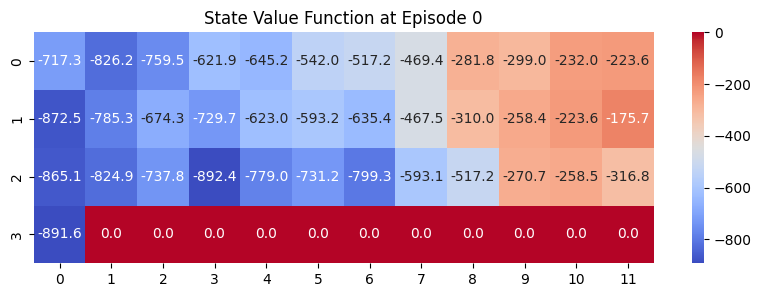

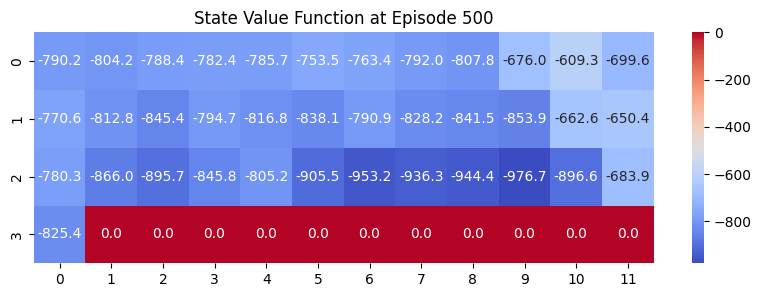

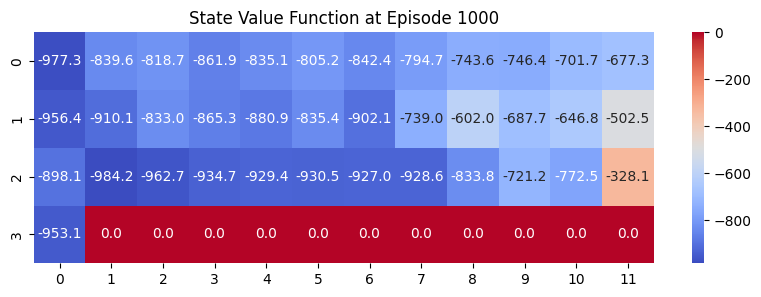

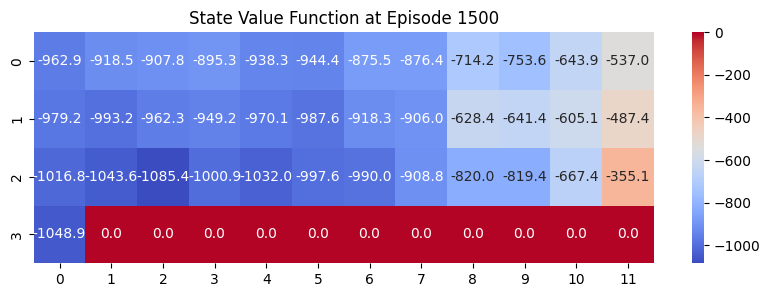

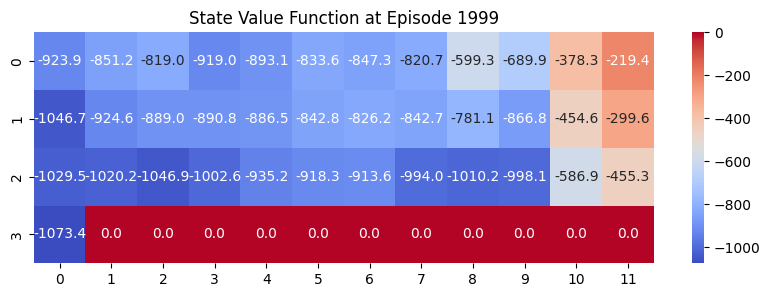

Final Learned Value Function:
[ -923.90262006  -851.23847625  -819.00317118  -919.01164779
  -893.05158472  -833.64849647  -847.29463132  -820.72415517
  -599.31687577  -689.94384794  -378.3474991   -219.39639449
 -1046.74751688  -924.60857524  -888.9684258   -890.82837744
  -886.53269008  -842.81336214  -826.22559964  -842.69980886
  -781.11531232  -866.76712269  -454.62885405  -299.60173943
 -1029.53364244 -1020.23491355 -1046.85216166 -1002.64159567
  -935.22354711  -918.25295408  -913.5624069   -994.01773571
 -1010.15960999  -998.09353104  -586.88047508  -455.28652414
 -1073.42888767     0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.        ]


In [3]:
class TDnAgent:
    def __init__(self, env, grid_size, alpha=0.1, gamma=0.99, n=5):
        self.env = env
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.n = n  # Number of steps for TD(n)
        self.V = np.zeros(env.observation_space.n)  # State-value function
        self.grid_size = grid_size

    def policy(self, state):
        """Purely random policy: chooses actions uniformly."""
        return self.env.action_space.sample()

    def train(self, episodes=1000, visualize_interval=100):
        for episode in range(episodes):
            state = self.env.reset()[0]
            done = False
            states, rewards = [], []

            while not done:
                action = self.policy(state)
                next_state, reward, done, _, _ = self.env.step(action)

                states.append(state)
                rewards.append(reward)

                # TD(n) Update
                if len(states) >= self.n:
                    G = sum([self.gamma ** i * rewards[i] for i in range(self.n)])  # Compute return
                    G += self.gamma ** self.n * self.V[next_state]  # Bootstrapped return
                    self.V[states[0]] += self.alpha * (G - self.V[states[0]])

                    # Remove first state and reward from buffer
                    states.pop(0)
                    rewards.pop(0)

                state = next_state  # Move to next state

            # Final updates for remaining steps
            while len(states) > 0:
                G = sum([self.gamma ** i * rewards[i] for i in range(len(rewards))])
                self.V[states[0]] += self.alpha * (G - self.V[states[0]])
                states.pop(0)
                rewards.pop(0)

            if episode % visualize_interval == 0 or episode == episodes - 1:
                self.visualize_value_function(episode)

    def visualize_value_function(self, episode):
        """Visualizes the learned state-value function as a heatmap."""
        plt.figure(figsize=(10, 3))
        sns.heatmap(self.V.reshape(self.grid_size), annot=True, fmt = ".1f", cmap="coolwarm", cbar=True)
        plt.title(f"State Value Function at Episode {episode}")
        plt.show()
        time.sleep(0.5)

    def get_value_function(self):
        return self.V


env = gym.make("CliffWalking-v0")
grid_size = env.unwrapped.shape

agent = TDnAgent(env, grid_size, n=10)

# Train the agent
agent.train(episodes=2000, visualize_interval=500)

# Print final learned state values
print("Final Learned Value Function:")
print(agent.get_value_function())
